# Week 3 Lab Activity

In this week’s lab, students will perform the following activities in the College lab.

Take an example for image recognition

Design CNN for image recognition

Implementation of CNN

Each individual should submit a report on the lab activity. The report must contain the program code, output and necessary explanation.

## Implementation

### First Step

1. Initially we will load the data from folder where there are 268 images of keyboard and monitor
2. We convert this images into numpy array
3. We merge the two arrays into one

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define a function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Provide the path to the directory containing images
folder_path = './pc_parts/keyboard'
foldernot_path = './pc_parts/monitor'

# Load images from the specified directory
images_keyboard = load_images_from_folder(folder_path)
images_monitor = load_images_from_folder(foldernot_path)

# Convert the list of images to a NumPy array
images_np_keyboard = np.array(images_keyboard)
images_np_monitor = np.array(images_monitor)
images_np = np.concatenate([images_np_keyboard,images_np_monitor])

# Check the shape of the NumPy array
print("Shape of the NumPy array containing images:", images_np.shape)


Shape of the NumPy array containing images: (524, 256, 256, 3)


### Second Step

We show the data that we are about to train, first 4 images of each of the datasets.

It is to be noted that all the images are of size 256 , 256 with 3 channels of RGB values.

In total we also can see the number of images is 524 from the shape of concatenated images.

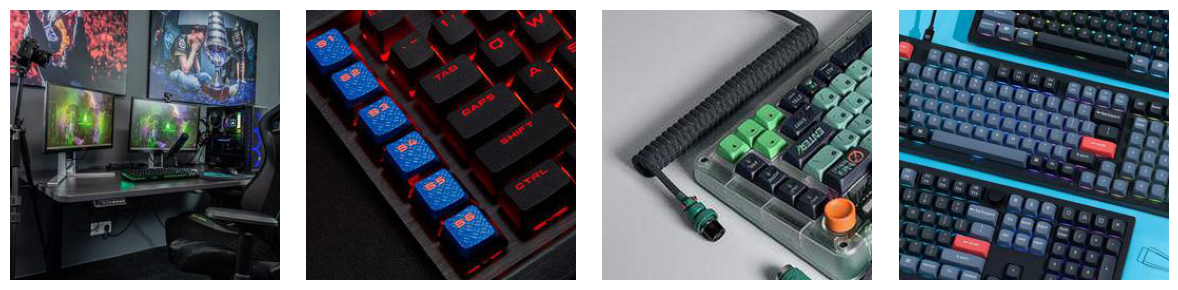

In [2]:
show_image_count = 0
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for filename in os.listdir(folder_path):
  img = Image.open(os.path.join(folder_path, filename))
  if img is not None:
    if(show_image_count>=4):
      break
    ax = axes[show_image_count]
    ax.imshow(img)
    ax.axis("off")
  show_image_count+=1

plt.tight_layout()
plt.show()


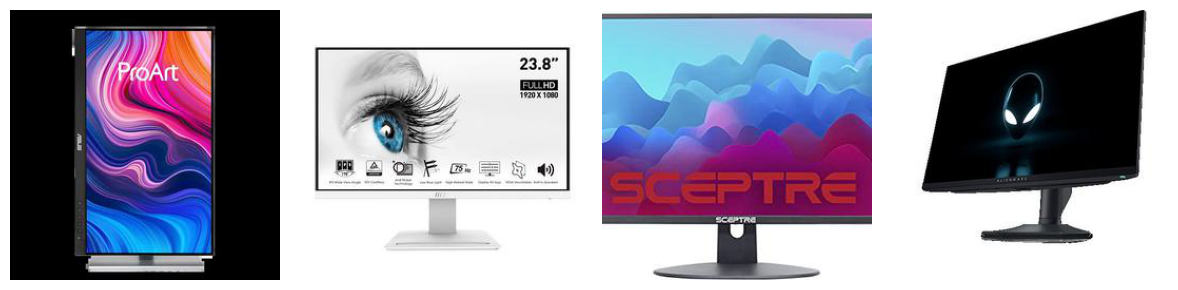

In [3]:
show_image_count = 0
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for filename in os.listdir(foldernot_path):
  img = Image.open(os.path.join(foldernot_path, filename))
  if img is not None:
    if(show_image_count>=4):
      break
    ax = axes[show_image_count]
    ax.imshow(img)
    ax.axis("off")
  show_image_count+=1

plt.tight_layout()
plt.show()


### Third Step

1. We will divide the data into training and testing dataset
2. We will also create labels for classification of the two dataset where 1 represents keyboard and 0 is for monitor

It is to be noted that since the images array was concatenated as keyboard + monitor we should also label it accordingly ie, label 0 first and label 1 later.


In [4]:
from sklearn.model_selection import train_test_split

labelsKeyboard = [1] * len(images_keyboard)  # Assigning label 1 for keyboards
labelsMonitor = [0] * len(images_monitor)  # Assigning label 1 for keyboards

labelK = np.array(labelsKeyboard)
labelM = np.array(labelsMonitor)


labels_np = np.concatenate([labelK,labelM])

#split data into test and tests
X_train, X_val, y_train, y_val = train_test_split(images_np,labels_np, test_size=0.4, random_state=3)

# Normalize pixel values to be between 0 and 1


In [5]:
y_train.shape

(314,)

### Implementation of CNN

We will be using Keras library for desiging, traning and testing our model

### Model Architecture

We are using adam optimizer and loss function is calculated using binary crossentropy because our result is classification of two images.

1. We are combining Conv2D layer with MaxPooling2D layer in pairs to perform processing and image resizing in neural network.
2. MaxPooling2D helps to reduce the total number of computation by a factor of 2x2 since it utilizes max value.
3. In our current setup the Conv2D network is increasing in filters and has fixed Kernel Size of 3.
4. After the first two layers there is a dropout of 30% so that it gives some uncertanity to our training.
5. Similarly we do a drop out after the middle hidden layer too and then decrease the filters.
6. At final three stages we flatten the image put it through a dense layer of 32 nodes and then finally merge it into 1 dense layer as output.
7. We can notice that we have used activation function as ReLu for all of the layers except our output layer.
8. The output we need is a binary classification of 0 (keyboard) or 1 (monitor) so we use activation function sigmoid for this layer as the values will get limited down between 0 and 1.

### Model Training

We will be performing 25 epoch for this simple traning and  batch size of 16, we will also be validating our training with the splitted test data and labels

In [22]:
import tensorflow as tf
from keras import layers, models, utils

#Define CNN
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.6),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (keyboard or not)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train, epochs=25, batch_size=64, validation_data=(X_val,y_val))



Epoch 1/25


2024-04-25 20:45:05.966610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 216.7556 - accuracy: 0.5127

2024-04-25 20:45:09.635182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 5s 798ms/step - loss: 216.7556 - accuracy: 0.5127 - val_loss: 8.3611 - val_accuracy: 0.4952
Epoch 2/25
5/5 [==============================] - 4s 743ms/step - loss: 84.8328 - accuracy: 0.4841 - val_loss: 228.3643 - val_accuracy: 0.4952
Epoch 3/25
5/5 [==============================] - 3s 707ms/step - loss: 1408.9988 - accuracy: 0.4841 - val_loss: 3866.8477 - val_accuracy: 0.4952
Epoch 4/25
5/5 [==============================] - 3s 706ms/step - loss: 10458.4980 - accuracy: 0.4841 - val_loss: 13296.1748 - val_accuracy: 0.4905
Epoch 5/25
5/5 [==============================] - 4s 765ms/step - loss: 13781.9570 - accuracy: 0.5446 - val_loss: 7292.2061 - val_accuracy: 0.5048
Epoch 6/25
5/5 [==============================] - 3s 689ms/step - loss: 9262.4434 - accuracy: 0.5159 - val_loss: 5996.3267 - val_accuracy: 0.5571
Epoch 7/25
5/5 [==============================] - 3s 694ms/step - loss: 8599.3174 - accuracy: 0.5287 - val_loss: 5309.5728 - val_accuracy: 

### Evaluating Model

Finally we can see the accuracy and loss of our model by averaging the epoch.

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_val,y_val)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 61ms/step - loss: 12824.9668 - accuracy: 0.6048
Test accuracy: 0.6047618985176086


### Predicting the outcome**

We will be using 5 different images of prediction
1. We will use 2 images (one from keyboard folder and another from monitor) from the dataset itself for prediction
2. We will use a keyboard image randomly downloaded from internet to make prediction
3. We will similarly be using a monitor image from the internet
4. Finally we will use an outlier image to see which fits it the best

1/1 [==============================] - 0s 17ms/step


2024-04-25 20:46:37.678830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


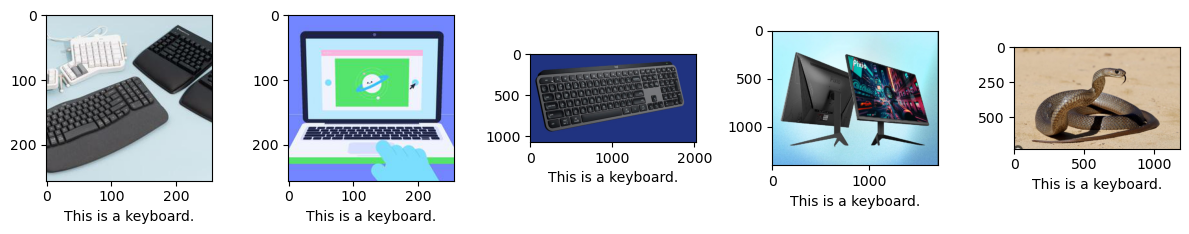

In [24]:


#Keyboard image from dataset
keyboard = './pc_parts/keyboard/89.jpg'

#Monitor image from dataset
monitor = './pc_parts/monitor/14.jpg'

#Keyboard image from internet
keyboard_internet = './input_images/keyboard.jpeg'

#Monitor Image from internet
monitor_internet = './input_images/monitor.jpeg'

#Random Image (of a snake)
snake = './input_images/snake.jpeg'

#Add image that you want to predict for
prediction_image_path = snake

images_path = {"keyboard":keyboard,"monitor":monitor,"keyboard_internet":keyboard_internet,"monitor_internet":monitor_internet,"random":snake}

# prediction_image = Image.open(prediction_image_path)
# prediction_image = np.array(prediction_image) / 255.0  # Normalize pixel values


show_image_count = 0
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for key in images_path:
  img = Image.open(images_path[key])
  show_img = img
  img = img.resize(size=(256,256))
  img = np.array(img)/255.0
  img = np.expand_dims(img, axis=0)
  if img is not None:
    predictions = model.predict(img)
    # Convert the prediction to a human-readable label
    ax = axes[show_image_count]
    if predictions[0][0] > 0.5:
        ax.set_xlabel("This is a keyboard.")
    else:
        ax.set_xlabel("This is a monitor.")
    ax.imshow(show_img)
    ax.axis("on")
    
  show_image_count+=1

plt.tight_layout()
plt.show()



### **Output**
#### Conclusion
We can see that the outputs of each of the images matches as per the input given.
In case of keyboard we can also explore via the dataset that a lot of images were outliers which were incorrectly detected.

When we put a random image, in this case a snake, the image is detected as monitor which the Convulational Neural Network has classified. Such can be cases for random images. If we were to perform more training the accuracy could be higher.

**Current result : loss: 3.2911 - accuracy: 0.6810 (68.1%)**

### **Test Codes**

In [9]:
new_image_path = './input_images/snake.jpeg'
new_image = Image.open(new_image_path)
new_image = new_image.resize(size=(256,256))
new_image = np.array(new_image)
new_image = new_image/255

new_image = np.expand_dims(new_image, axis=0)

predictions = model.predict(new_image)
# Reshape the image to match the input shape of the model
# new_image = np.expand_dims(new_image, axis=-1)
# new_image = np.expand_dims(new_image, axis=0)

if(predictions[0][0]>0.5):
    print("Keyboard")
else:
    print("Monitor")

new_image.shape

1/1 [==============================] - 0s 15ms/step
Monitor


(1, 256, 256, 3)

## Links and file

[Image Datasets](https://www.kaggle.com/datasets/asaniczka/pc-parts-images-dataset-classification)


[Source Code](https://github.com/adds08/pcparts-image-classifier.git)